# Managing Epidemics Through Mathematical Modeling

This lesson will examine the spread of an epidemic over time using Euler's method. The model is a system of non-linear ODEs which is based on the classic Susceptible, Infected, Recovered (SIR) model. This model introduces a new parameter  to include vaccinations. We will examine the various paremeters of the model and define conditions necessary to erradicate the epidemic.

In this module we will also introduce ipywigets, an IPython library that allows you to add widgets to your notebooks and make them interactive! We will be using widgets to vary our parameters and see how changing different parameters affects the results of the model. This is a great technique for making quick and easy comparisons because you don't have to re-run your cell for the widget to make changes to the graph. 

## Introducing Model Parameters

The most important part of understanding any model is understanding the nomenclature that is associated with it. Please review the below terms carefully and make sure you understand what each parameter represents.

$S$: Susceptible Individuals

$V$: Vaccinated Individuals

$I$: Infected Individuals

$R$: Recovered Individuals with Immunity (Cannot get infected again)

$p$: Fraction of individuals who are vaccinated at birth 

$e$: Fraction of the vaccinated individuals that are successfully vaccinated

$\mu$: Average Death Rate

$\beta$: Contact Rate (Rate at which Susceptibles come into contact with Infected)

$\gamma$: Recovery Rate

$R_0$: Basic Reporoduction Number

$N$: Total Population ($S + V + I + R$)


## Basic SVIR Model

### Susceptible Equation
Let's examine the model by component. First we will breakdown the susceptible individuals. In order to find the rate of change of susceptible individuls we must calculate the number of newborns that are not vaccinated:

$$(1-ep) \mu N$$

The number of Susceptible Individuals that become infected:

$$ \beta IS_{infections}$$

and finally the number of Susceptibles that die:

$$ \mu S_{deaths}$$

Therefore the change in Susceptible Indivduals becomes:

$$\frac{dS}{dt} = (1-ep) \mu N - \beta IS - \mu S$$


### Vaccinated Equation

Now examining the vaccinated individuals we start with the newborns that are vaccinated:

$$ep \mu N$$

And the number of vaccinated individuals that die:

$$\mu V$$

The change in vaccinated individuals becomes:

$$\frac{dV}{dt} = ep \mu N - \mu V$$

### Infected Equation

For the infected individuals we start with the number of Susceptible individuals that are exposed and become infected:

$$\beta IS_{infections}$$

Next we need the number of Infected individuals that recovered:

$$\gamma I_{recoveries}$$

Finally we examine the infected who die:

$$\mu I_{deaths}$$

Putting this all together we get the following equation:

$$\frac{dI}{dt} = \beta IS - \gamma I - \mu I$$

### Recovered Equation

The number of recovered individuals first relies on the infected who recover:

$$\gamma I$$

Next it depeds on the recovered individuals who die:

$$\mu R$$

Putting this together yeilds the equation:

$$\frac{dR}{dt} = \gamma I - \mu R$$

## Model Summary and Assumptions

The complete model is as follows:

$$\frac{dS}{dt} = (1-ep) \mu N - \beta IS - \mu S$$

$$\frac{dV}{dt} = ep \mu N - \mu V$$

$$\frac{dI}{dt} = \beta IS - \gamma I - \mu I$$

$$\frac{dR}{dt} = \gamma I - \mu R$$

In [238]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

#Statistics from cia world factbook

e = .1
p = .75
#mu = .00815
mu = .02
#N = 321368864 #As of Jul 2015 estimate
beta = .002
gamma = .5

S0 = 100
V0 = 50
I0 = 75
R0 = 10

N = S0 + I0 + R0 + V0

#S[i] = (1-e*p)*mu*N - beta*I[i-1]*S[i-1] - mu*S[i-1]
#V[i] = e*p*mu*N - mu*V[i-1]
#I[i] = beta*I[i-1]*S[i-1] - gamma*I[i-1] - mu*I[i-1]
#R[i] = gamma*I[i-1] - mu*R[i-1]

In [305]:
def f(u):
    
    S = u[0]
    V = u[1]
    I = u[2]
    R = u[3]
    
    return numpy.array([(1-e*p)*mu*N - beta*I*S - mu*S,
                       e*p*mu*N - mu*V,
                       beta*I*S - gamma*I - mu*I,
                       gamma*I - mu*R])

In [306]:
print(322*.33*.002)
print(gamma*.33)
print(mu*.33)

0.21252000000000001
0.033
0.006600000000000001


In [307]:
def euler_step(u, f, dt):
    return u + dt * f(u)

In [309]:
T = 365
dt = 1
N = int(T/dt)+1
t = numpy.linspace(0, T, N)

u = numpy.zeros((N,4))
u[0] = [S0, V0, I0, R0]

for n in range(N-1):
    u[n+1] = euler_step(u[n], f, dt)


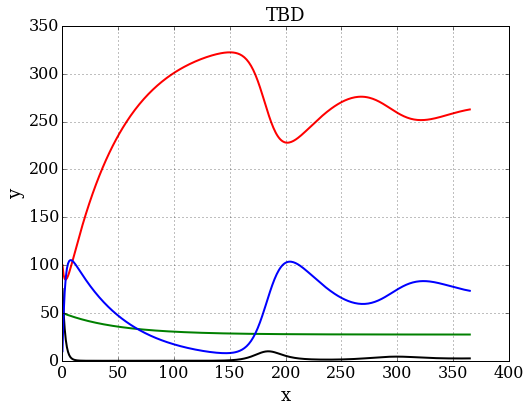

In [243]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('TBD', fontsize=18)
pyplot.plot(t,u[:,0], color= 'red', lw=2);
pyplot.plot(t,u[:,1], color='green', lw=2);
pyplot.plot(t,u[:,2], color='black', lw=2);
pyplot.plot(t,u[:,3], color='blue', lw=2);

In [252]:
from ipywidgets import interact, HTML, FloatSlider
from IPython.display import clear_output, display


Project Structure

-Introduction of problem
-Latex equations and derivations
-Initial Code
-Same code with varied parameters
-Introduction of python widgets
-Install instructions
-Code implementation
-Final graph with fully functioning widgets!
-Stylesheet



In [204]:
def z(x):
    print(x)
interact(z, x=True)
interact(z, x=10)



True


In [314]:
def f(u, init):
    
    S = u[0]
    V = u[1]
    I = u[2]
    R = u[3]
    
    p = init[0]
    e = init[1]
    mu = init[2]
    beta = init[3]
    gamma = init[4]
    
    return numpy.array([(1-e*p)*mu*N - beta*I*S - mu*S,
                       e*p*mu*N - mu*V,
                       beta*I*S - gamma*I - mu*I,
                       gamma*I - mu*R])

In [315]:
def euler_step(u, f, dt, init):
    return u + dt * f(u, init)

In [316]:
e = .1
p = .5
#mu = .00815
mu = .02
#N = 321368864 #As of Jul 2015 estimate
beta = .002
gamma = .1

S0 = 100
V0 = 50
I0 = 75
R0 = 10

N = S0 + I0 + R0 + V0

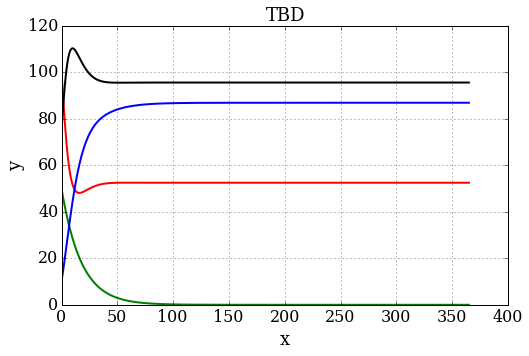

In [322]:
pSlider = FloatSlider(description='p', min=0, max=1, step=0.1)
eSlider = FloatSlider(description='e', min=0, max=1, step=0.1)
muSlider = FloatSlider(description='mu', min=0, max=1, step=0.005)
betaSlider = FloatSlider(description='beta', min=0, max=.01, step=0.0005)
gammaSlider = FloatSlider(description='gamma', min=0, max=1, step=0.05)

def update():
    p = pSlider.value
    e = eSlider.value    
    mu = muSlider.value
    beta = betaSlider.value
    gamma = gammaSlider.value
    
    N = S0 + I0 + R0 + V0
    print(p,e)
    T = 365
    dt = 1
    N = int(T/dt)+1
    t = numpy.linspace(0, T, N)

    u = numpy.zeros((N,4))
    u[0] = [S0, V0, I0, R0]
    
    init = numpy.array([p,e,mu,beta,gamma])

    for n in range(N-1):
        u[n+1] = euler_step(u[n], f, dt, init)
        
    pyplot.figure(figsize=(8,5))
    pyplot.grid(True)
    pyplot.xlabel(r'x', fontsize=18)
    pyplot.ylabel(r'y', fontsize=18)
    pyplot.title('TBD', fontsize=18)
    pyplot.plot(t,u[:,0], color= 'red', lw=2);
    pyplot.plot(t,u[:,1], color='green', lw=2);
    pyplot.plot(t,u[:,2], color='black', lw=2);
    pyplot.plot(t,u[:,3], color='blue', lw=2);
    
    clear_output(True)

pSlider.on_trait_change(update, 'value')
eSlider.on_trait_change(update, 'value')
muSlider.on_trait_change(update, 'value')
betaSlider.on_trait_change(update, 'value')
gammaSlider.on_trait_change(update, 'value')

    
display(pSlider, eSlider, muSlider, betaSlider, gammaSlider)
update()

Dig deeper?

create an array of famous virus initial conditions and ask the user to build a function that takes in the value of a user answer using ipywidgets and return the desired result for that disease



In [ ]:
Disease = [{name: Ebola, Location: US, gamma: .1}, {measles}, {malaria}, {TB}, {HIV}]

Ebola Vid
http://www.theguardian.com/world/video/2014/oct/22/ebola-virus-how-it-spreads-video

sliders
https://github.com/ipython/ipywidgets/issues/145

Model
http://bmb.oxfordjournals.org/content/62/1/187.long#F2

Simple Model
https://en.wikipedia.org/wiki/Epidemic_model

